    ID                  Name Sex   Age  Height  Weight            Team  NOC  \
3    4  Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden  DEN   
10   6       Per Knut Aaland   M  31.0   188.0    75.0   United States  USA   
11   6       Per Knut Aaland   M  31.0   188.0    75.0   United States  USA   
12   6       Per Knut Aaland   M  31.0   188.0    75.0   United States  USA   
13   6       Per Knut Aaland   M  31.0   188.0    75.0   United States  USA   

          Games  Year  Season         City                 Sport  \
3   1900 Summer  1900  Summer        Paris            Tug-Of-War   
10  1992 Winter  1992  Winter  Albertville  Cross Country Skiing   
11  1992 Winter  1992  Winter  Albertville  Cross Country Skiing   
12  1992 Winter  1992  Winter  Albertville  Cross Country Skiing   
13  1992 Winter  1992  Winter  Albertville  Cross Country Skiing   

                                                Event Medal  
3                         Tug-Of-War Men's Tug-Of-War 

<Axes: xlabel='Age', ylabel='Count'>

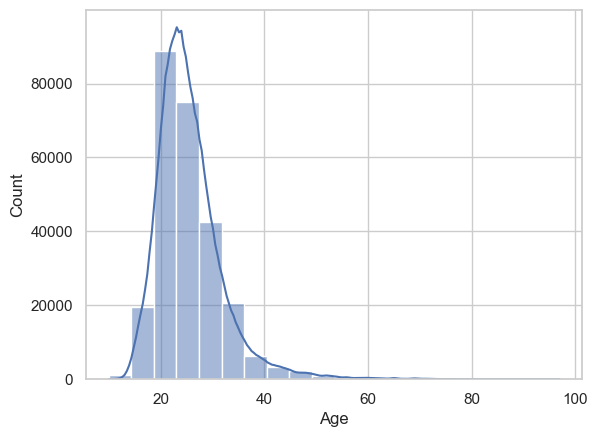

In [5]:
import pandas as pd
from google.cloud import storage
import os
from io import StringIO
import seaborn as sns

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "C:\\datapath\\datapath\\credenciales.json"

storage_client = storage.Client()

bucket_name = "cloudstoagereingesta"
blob_name = "athlete_events.csv"

bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob(blob_name)
data = blob.download_as_text()

df = pd.read_csv(StringIO(data),sep=",")

df.head()

filtered_df = df[df['Age'] > 30]
print(filtered_df.head())


filtered_df = df[df['Medal'] == 'Gold']
print(filtered_df.head())

sns.set(style="whitegrid")
sns.histplot(data=df, x="Age", bins=20, kde=True)

